In [1]:
# Importing Required Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import random
import names
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# End-to-End Modelling
1. Loading Packages and Dataset
1. Perform EDA
1. Data Handling - Outliers and Missing Values
1. Feature Engg
1. Generating X and Y
1. Splitting Train, Test
1. Building the Model
1. Predicting using the model
1. Evaluating the model
1. Optimize the model
1. Test Model again
1. Implement Model

In [2]:
# Loading Required Tables
df = pd.read_csv("petrol_consumption.csv")
df.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524


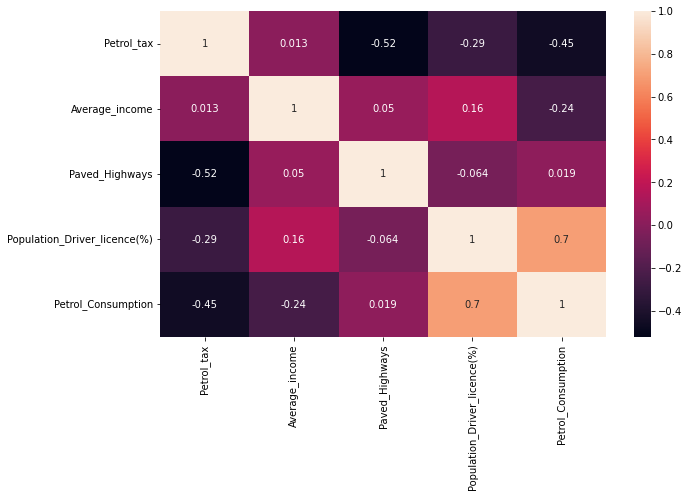

In [3]:
# Checking for Correlation among Indepedent Variables
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True);

In [4]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [5]:
x = df[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [10]:
df.shape

(48, 5)

In [6]:
x.head(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572


In [8]:
y.head(2)

0    541
1    524
Name: Petrol_Consumption, dtype: int64

In [56]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [57]:
x_train.shape

(33, 4)

In [58]:
x_test.shape

(15, 4)

# Building the Model

In [59]:
model = LinearRegression().fit(x_train, y_train)

In [60]:
y_hat = model.predict(x_test)
y_hat

array([638.16586377, 425.2444829 , 640.4697094 , 684.12461218,
       688.03763014, 547.92048188, 614.51076807, 524.59604919,
       584.09044642, 518.28014934, 554.47716407, 466.96184309,
       613.6825288 , 474.35483323, 665.92878681])

In [32]:
comp = pd.DataFrame({"Actual Data" : y_test, "Predicted Data" : y_hat, "Error" : y_test -  y_hat})
comp

,Actual Data,Predicted Data,Error
36,640,638.165864,1.834136
22,464,425.244483,38.755517
20,649,640.469709,8.530291
38,648,684.124612,-36.124612
18,865,688.037630,176.962370
1,524,547.920482,-23.920482
44,782,614.510768,167.489232
21,540,524.596049,15.403951
16,603,584.090446,18.909554
45,510,518.280149,-8.280149


In [34]:
# R Square Score
r2 = round(model.score(x_train, y_train), 2)
r2*100

65.0

# Adjusted R2 Score

In [35]:
x_train.shape[1]

4

In [36]:
len(x_train)

33

In [37]:
# 1 - [(1 - r2) * (n - 1)] / (n - k - 1)
# where k = no.of Independent Vars
# n = No.fof rows
adjr2 = round((1 - (1 - r2) * (len(x_train) -1) / (len(x_train) - x_train.shape[1] - 1))*100, 2) 
adjr2

60.0

# Adjusted R2 Score - Using Statsmodels

In [42]:
import statsmodels.api as sm

In [46]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()

In [49]:
print(round(model.rsquared_adj*100, 2))

60.27


# Errors

In [50]:
# Calculating Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_hat)
rmse = round(np.sqrt(mse), 2)
print(rmse)
print(y_hat.mean())

103.42
576.0563566192235


In [51]:
y_hat.min(), y_hat.max()

(425.2444829037928, 688.037630135086)

In [52]:
# Calculate MAPE
def mape(x, y):
    return round(abs((x - y) / x).mean()*100, 2)

In [53]:
print("Mean Absolute Percent Error is", mape(y_test, y_hat))

Mean Absolute Percent Error is 8.41


In [54]:
x_test.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

In [64]:
# Creating DF for Test Data
ivsvstv = pd.DataFrame({'Petrol_tax' : x_test['Petrol_tax'], 'Average_income' : x_test['Average_income'], 
                        "Actual Target" : y_test, 'Predicted Target': y_hat})
ivsvstv

,Petrol_tax,Average_income,Actual Target,Predicted Target
36,5.0,4045,640,638.165864
22,9.0,4897,464,425.244483
20,7.0,4593,649,640.469709
38,8.5,3635,648,684.124612
18,7.0,4716,865,688.037630
1,9.0,4092,524,547.920482
44,6.0,5215,782,614.510768
21,8.0,4983,540,524.596049
16,7.0,4206,603,584.090446
45,9.0,4476,510,518.280149


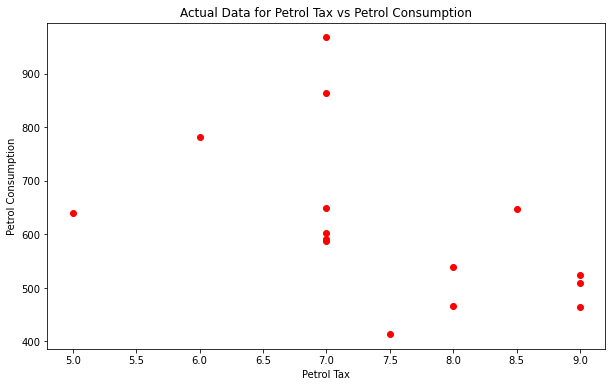

In [65]:
# Checking the interaction between IV and TV
plt.figure(figsize = (10, 6))
plt.title("Actual Data for Petrol Tax vs Petrol Consumption")
plt.scatter(ivsvstv['Petrol_tax'], ivsvstv['Actual Target'], color = 'r')
plt.xlabel("Petrol Tax")
plt.ylabel("Petrol Consumption");

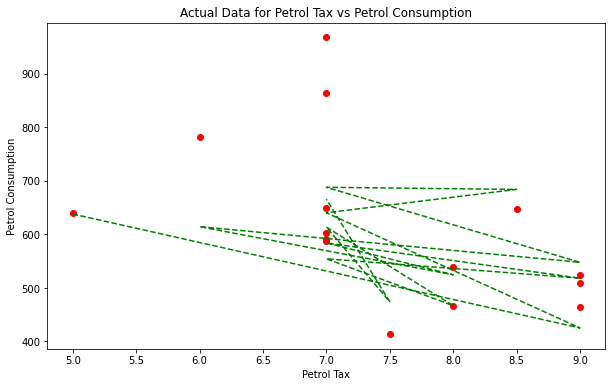

In [66]:
# Plotting the extracted pattern from building the model against raw data
plt.figure(figsize = (10, 6))
plt.title("Actual Data for Petrol Tax vs Petrol Consumption")
plt.scatter(ivsvstv['Petrol_tax'], ivsvstv['Actual Target'], color = 'r')
plt.plot(ivsvstv['Petrol_tax'],  ivsvstv['Predicted Target'], 'g--')
plt.xlabel("Petrol Tax")
plt.ylabel("Petrol Consumption");